The 10-20 system of electrode placement in bipolar longitudinal montage
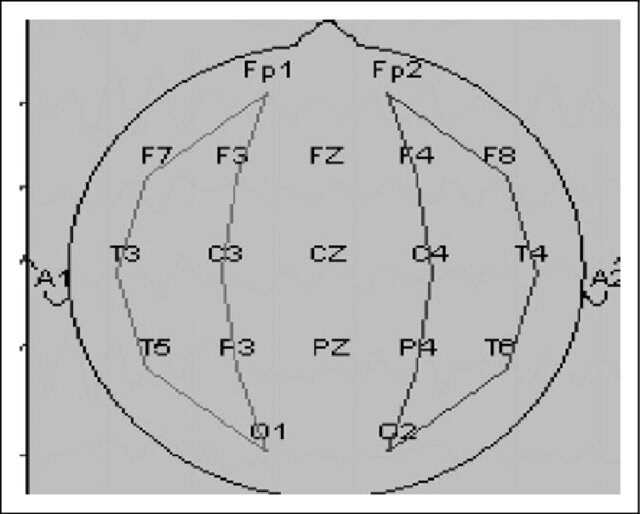

In [41]:
%matplotlib qt

Extracting EDF parameters from c:\Data\Epsilon-CDSP\Final-Project\NeuroGuard\Siena-Scalp-EEG-Database-v1.0.0\siena-scalp-eeg-database-1.0.0\PN00\PN00-1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 1343999  =      0.000 ...  2624.998 secs...
['EEG Fp1', 'EEG F3', 'EEG C3', 'EEG P3', 'EEG O1', 'EEG F7', 'EEG T3', 'EEG T5', 'EEG Fc1', 'EEG Fc5', 'EEG Cp1', 'EEG Cp5', 'EEG F9', 'EEG Fz', 'EEG Cz', 'EEG Pz', 'EEG Fp2', 'EEG F4', 'EEG C4', 'EEG P4', 'EEG O2', 'EEG F8', 'EEG T4', 'EEG T6', 'EEG Fc2', 'EEG Fc6', 'EEG Cp2', 'EEG Cp6', 'EEG F10', 'EKG EKG', 'SPO2', 'HR', '1', '2', 'MK']
EEG channel type selected for re-referencing
Creating RawArray with float64 data, n_channels=15, n_times=1344000
    Range : 0 ... 1343999 =      0.000 ...  2624.998 secs
Ready.
Added the following bipolar channels:
EEG Fp1-EEG F7, EEG F7-EEG T3, EEG T3-EEG T5, EEG T5-EEG O1, EEG Fp1-EEG F3, EEG C3-EEG F3, EEG F3-EEG O1, EEG Fp2-EEG F4, EEG F4-EEG C4, EEG

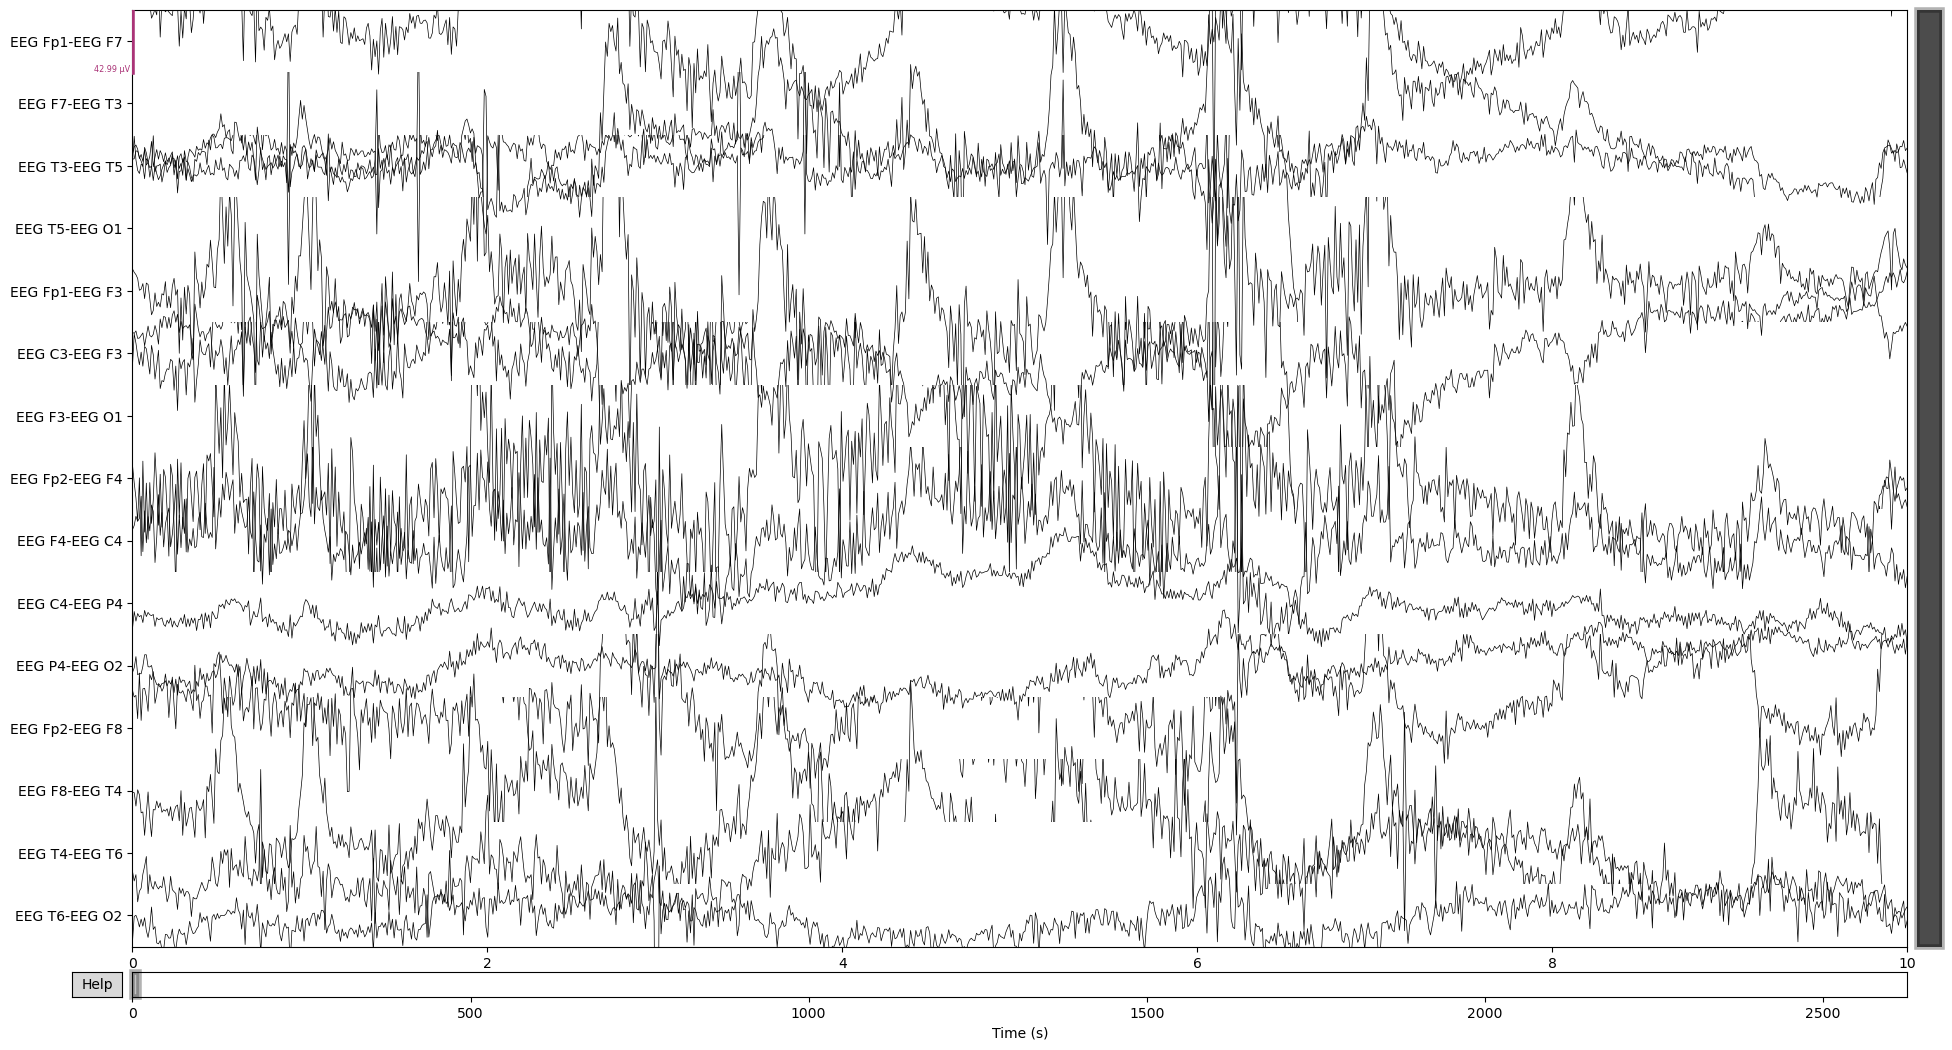

Channels marked as bad:
none


In [72]:
import mne

# Load the EDF file
raw = mne.io.read_raw_edf('Siena-Scalp-EEG-Database-v1.0.0\siena-scalp-eeg-database-1.0.0\PN00\PN00-1.edf', preload=True)
print(raw.info['ch_names'])

# Define the channel pairs 
channel_pairs = [['EEG Fp1', 'EEG F7'], ['EEG F7', 'EEG T3'], ['EEG T3', 'EEG T5'], ['EEG T5', 'EEG O1'],
                 ['EEG Fp1', 'EEG F3'], ['EEG C3', 'EEG F3'], ['EEG F3', 'EEG O1'], ['EEG Fp2', 'EEG F4'],
                 ['EEG F4', 'EEG C4'], ['EEG C4', 'EEG P4'], ['EEG P4', 'EEG O2'], ['EEG Fp2', 'EEG F8'],
                 ['EEG F8', 'EEG T4'], ['EEG T4', 'EEG T6'], ['EEG T6', 'EEG O2']]
channel_pairs_joined = ['{}-{}'.format(pair[0], pair[1]) for pair in channel_pairs]
# # this splits electrodes into 3 groups; left, midline, and right
# ch_names = mne.channels.make_1020_channel_selections(raw.info, return_ch_names=True)
# left = ch_names['Left']
# midline = ch_names['Midline']
# right = ch_names['Right']
# print(left)
# print(midline)
# print(right)


#raw_bip_ref.drop_channels(raw.info['ch_names'])
#print(raw_bip_ref.info['ch_names'])
# Perform bipolar longitudinal referencing
anodes = []
cathodes = []
for pair in channel_pairs:
    anodes.append(pair[0])
    cathodes.append(pair[1])

raw_bip_ref = mne.set_bipolar_reference(raw, anode=anodes, cathode=cathodes)
raw_bip_ref_ch = raw_bip_ref.copy().pick_channels(channel_pairs_joined)
# Plot the bipolar longitudinal montage
raw_bip_ref_ch.plot(scalings='auto', n_channels=len(channel_pairs_joined), title='Bipolar Longitudinal Montage')


In [73]:
raw_bip_ref_ch.describe()

<RawEDF | PN00-1.edf, 15 x 1344000 (2625.0 s), ~153.8 MB, data loaded>
ch  name            type  unit        min         Q1     median         Q3        max
 0  EEG Fp1-EEG F7  EEG   µV      -610.88     -16.50      -3.75      10.88    1231.62
 1  EEG F7-EEG T3   EEG   µV      -390.38      -9.50       0.38      11.75     500.75
 2  EEG T3-EEG T5   EEG   µV      -677.75     -11.87      -3.50       4.63     462.75
 3  EEG T5-EEG O1   EEG   µV     -3192.75      -8.37       1.63      12.38    1165.87
 4  EEG Fp1-EEG F3  EEG   µV     -1342.87     -14.50      -2.75       9.38    1284.12
 5  EEG C3-EEG F3   EEG   µV      -678.75      -9.62      -0.50       7.62     233.25
 6  EEG F3-EEG O1   EEG   µV     -3144.50     -16.62      -2.13      14.37    1161.12
 7  EEG Fp2-EEG F4  EEG   µV     -1082.00     -13.25      -1.25      12.25    1544.00
 8  EEG F4-EEG C4   EEG   µV      -251.62      -8.25       0.88      10.62     671.25
 9  EEG C4-EEG P4   EEG   µV      -223.00     -10.00      -3.13      

Effective window size : 4.000 (s)


C:\Users\MUSA\AppData\Local\Temp\ipykernel_48268\1502791874.py:1: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw_bip_ref_ch.compute_psd().plot()


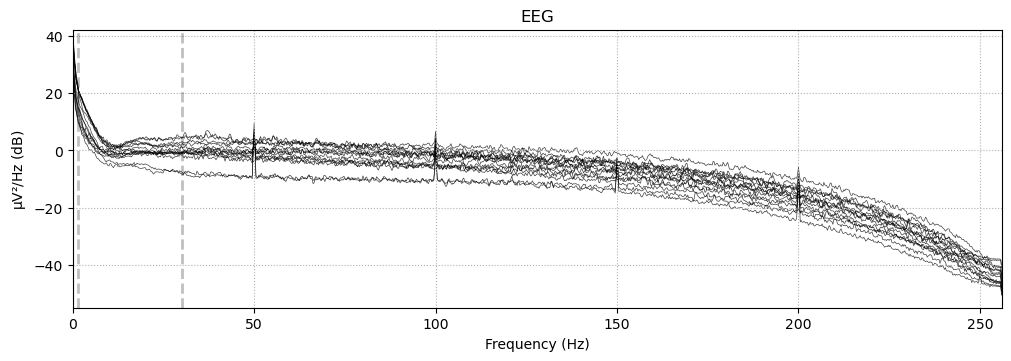

In [76]:
#Plotting spectral density of the bipolar longitudinal montage
raw_bip_ref_ch.compute_psd().plot()